# Lab 4: Building an Image Classifier from Scratch

The main goal of this lab is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not. 

You will build and train a classifier in two ways: 
- first using the original data set that you create, and 
- second, using data augmentation techniques. 

**Grading:** 

50% of the grade will come from error-free code that accomplishes all the steps outlined in the instructions for each part of this lab and written in Python/Keras. The other 50% will come from the comments associated with that code, where the comments explain what the code is doing and why it is important to the overall objective. Thus, comments like "split the data" or "train the model" would receive a grade of 0 as they do not indicate any understanding.

**Research Required:** 

To complete this lab successfully you will need to some research. At the very least, you will need to implement the [`ImageDataGenerator` class](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and the [`.flow_from_directory` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory). 

**What to submit:**
- A copy of this notebook with:
    - Error-free code in Python/Keras
    - All code cells executed and output visible
- Include a zipped file of your images



## Part 1: Prep Work
### Choose an Object

**You may choose any object other than a cat**. Try to think of an object that is readily available for taking pictures and, preferably, outdoors, as that will add to the natural variability to the data.

### Create a Dataset

Take 80 pictures of the chosen object and 80 pictures of other things that are not your object. Each group member should supply a roughly equal number of pictures so as to increase variability in your dataset. 

From these 160 images you will create a training set (50 object/50 not object), a validation set (15 object/15 not object), and a test set (15 object/15 not object).

It's best if your dataset is diverse, so take pictures of the chosen **object** with, for example, different lighting, from different angles, different distances from camera, different examples of the same type of object. Similarly for the **not object** images: try to include a variety of objects in different ways. 

## Part 2: Using the Original Data

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in `train`, `validation`, and `test` folders. 

### Dataset Loading and Processing with Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

You should then use the training data generator to print out some examples of the training images and corresponding labels. 

### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that you can maximize the validation accuracy. 

Any overfitting should be addressed; that is, if your model begins overfitting after epoch 3, you should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

In [131]:
# importing all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import warnings
warnings.filterwarnings("ignore")

ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [132]:
os.getcwd() # getting current working directory

'D:\\St Clair\\Semester 3\\Machine Learning 2\\Labs\\Lab 4\\Lab4'

In [133]:
os.chdir("D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4") # changing the directory
os.getcwd() 

'D:\\St Clair\\Semester 3\\Machine Learning 2\\Labs\\Lab 4\\Lab4'

In [134]:
os.listdir("D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4") # listing the directoreies

['test', 'train', 'validation']

In [135]:
df = "D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4" # creating and assigning the path to dataframe

In [136]:
gen = ImageDataGenerator() # creating the instance of the generator

In [137]:
gen_train = ImageDataGenerator(rescale=1./255) # rescaling the images for training set from 0 - 1

In [138]:
print(gen_train)

In [139]:
gen_test = ImageDataGenerator(rescale=1./255) # rescaling the images for testing set from 0 - 1

In [140]:
gen_validation = ImageDataGenerator(rescale=1./255) # rescaling the images for validation set from 0 - 1

In [141]:
gen_train1 = gen_train.flow_from_directory(
    r"D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4\train",
    target_size=(148, 148),
    batch_size=32,
    class_mode='binary',
    classes = ['crocodile', 'others']
)                                         # creating batches for the training set

Found 100 images belonging to 2 classes.


In [142]:
gen_test1 = gen_test.flow_from_directory(r"D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4\test",
                                         target_size=(148, 148), batch_size=32, class_mode='binary', classes = ['crocodile', 'others'])
# creating batches for the test set

Found 30 images belonging to 2 classes.


In [143]:
gen_validation1 = gen_validation.flow_from_directory(r"D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4\validation",
                                                    target_size=(148, 148), batch_size=32, class_mode='binary', classes = ['crocodile', 'others'])
# creating batches for validation set

Found 30 images belonging to 2 classes.


In [144]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(148,148), 
    classes=('train','test','validation')
) 

# this will return an iterator that returns a batch everytime it's iterated on.
# To see how the data is organized, we can simply create this iterator, and get a first batch to look at it:

Found 160 images belonging to 3 classes.


In [145]:
# we can guess that the iterator has a next function, 
# because all python iterators have one. 
batch = iterator.next()
len(batch)

2

In [146]:
print(type(batch[0])) # type of the batches
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Since we got 2 numpy arrays above, we can now print their shape and type:

In [147]:
print(batch[0].shape) 
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 148, 148, 3)
float32
255.0
(32, 3)
float32


##### The first element is an array of 32 images with 148x148 pixels, and 3 color channels, encoded as floats in the range 0 to 255. So the ImageDataGenerator did force the image to 148x148 pixels as requested, but didn't normalize the color levels between 0 and 1. We will do that later. The second element contains the 32 corresponding labels with 3 color channels.

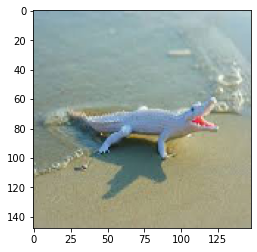

In [148]:
plt.imshow(batch[0][0].astype(np.int))

In [149]:
batch[1][0] # corresponding label for the above image

array([1., 0., 0.], dtype=float32)

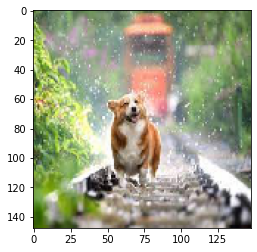

In [150]:
plt.imshow(batch[0][10].astype(np.int))

In [151]:
batch[1][10] # corresponding label for the above image

array([1., 0., 0.], dtype=float32)

In [152]:
gen = ImageDataGenerator(
    rescale = 1/255.
)

In [153]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(148,148,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])


history = model.fit_generator(
    gen_train1, 
    validation_data = gen_validation1,
    workers=10,
    epochs=20,
)

test_loss,test_acc = model.evaluate(gen_test1)
print('test_acc:', test_acc)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 144, 144, 24)      1824      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 72, 72, 24)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 68, 68, 48)        28848     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 34, 34, 48)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 30, 30, 96)        115296    
_________________________________________________________________
flatten_21 (Flatten)         (None, 86400)             0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 86400)           

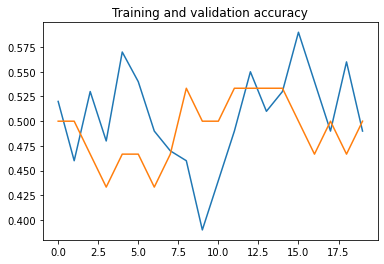

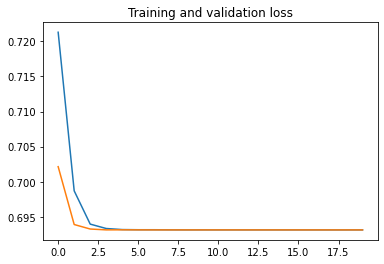

In [154]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()
    
plot_history(history, (0.65, 1.))

### As we can see from the above graphs, we have reached the validation accuracy of 53.33% which is not bad but can be improved further.

## Part 3: Using Data Augmentation

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Create Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

### Add Data Augmentation 

You should now add data augmentation to your training data generator. All available types of augmentation should be used. 

Print an image and examples of the same image augmented in different ways. (The `.load_img()` and [`.flow()` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) may be helpful here.)

### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset. 

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

In [155]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True,
    zoom_range = 0.3, 
    rotation_range = 15.,
)  

## applying all the augmented techniques like horizontal flip, zoom and rotation to the data

#### Effect of the above transformation:

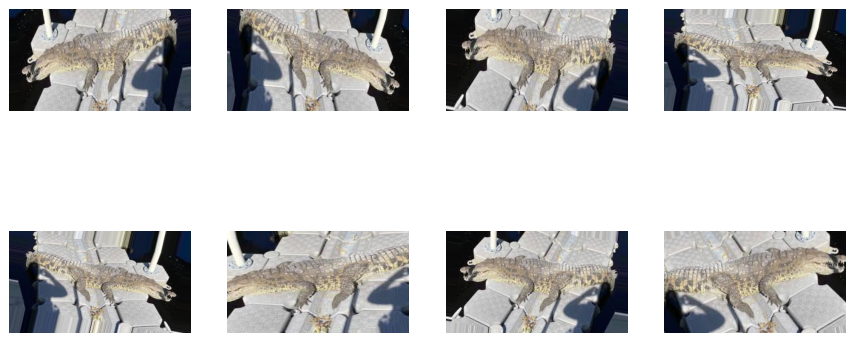

In [156]:
image = img.imread(r"D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4\train\crocodile\crocodile39.jpg")

def plot_transform():
    '''apply the transformation 8 times randomly'''
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

In [157]:
iterator = imgdatagen.flow_from_directory(
    os.getcwd(), 
    target_size=(148,148), 
    classes=('train','test','validation')
)

Found 160 images belonging to 3 classes.


In [158]:
gen_train1 = imgdatagen.flow_from_directory(
    r"D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4\train",
    target_size=(148, 148),
    batch_size=32,
    class_mode='binary',
    classes = ['crocodile', 'others']
)

Found 100 images belonging to 2 classes.


In [159]:
gen_validation1 = imgdatagen.flow_from_directory(r"D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4\validation",
                                                    target_size=(148, 148), batch_size=32, class_mode='binary', classes = ['crocodile', 'others'])

Found 30 images belonging to 2 classes.


In [160]:
gen_test1 = imgdatagen.flow_from_directory(r"D:\St Clair\Semester 3\Machine Learning 2\Labs\Lab 4\Lab4\test",
                                         target_size=(148, 148), batch_size=32, class_mode='binary', classes = ['crocodile', 'others'])

Found 30 images belonging to 2 classes.


### Baseline Model for Augmented data

In [161]:
model = keras.models.Sequential()

initializers = {                                       # initializing the model
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(148,148,3),                    # 24 neurons, determing input shape
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu',                          # 48 neurons
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu',                          # 96 neurons
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',                                 # 2 neurons
    )
)

model.summary()               # summary of the model

model.compile(loss='binary_crossentropy',                               # compiling the model with type of loss, optimizer
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])


history_augm = model.fit_generator(          # fitting the model on training
    gen_train1, 
    validation_data = gen_validation1,          # explicitly mentioning the validation set
    workers=10,
    epochs=20,
)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 144, 144, 24)      1824      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 72, 72, 24)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 68, 68, 48)        28848     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 34, 34, 48)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 30, 30, 96)        115296    
_________________________________________________________________
flatten_22 (Flatten)         (None, 86400)             0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 86400)           

### Here, we got the maximum validation accuracy of 0.5000 which is very low, so now we will tune the model further to increase its accuracy.

### Tuning the model further


In [162]:
model1 = keras.models.Sequential()

initializers = {
    
}
model1.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(148,148,3), 
        activation='relu', 
    )
)
model1.add( keras.layers.MaxPooling2D(2) )
model1.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model1.add( keras.layers.MaxPooling2D(3) )
model1.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model1.add( keras.layers.Flatten() )
model1.add( keras.layers.Dropout(0.9) )

model1.add( keras.layers.Dense(
    4, activation='softmax',
    )
)

model1.summary()

model1.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])


history_augm = model1.fit_generator(
    gen_train1, 
    validation_data = gen_validation1,
    epochs=25
)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 144, 144, 24)      1824      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 72, 72, 24)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 68, 68, 48)        28848     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 22, 22, 48)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 18, 18, 96)        115296    
_________________________________________________________________
flatten_23 (Flatten)         (None, 31104)             0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 31104)           

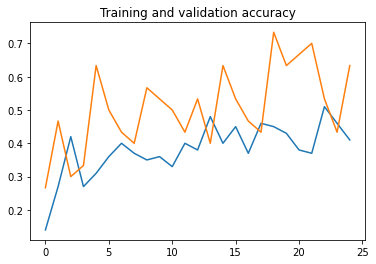

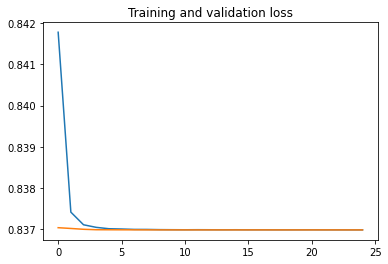

In [166]:
plot_history(history_augm, (0.65, 1.))  # plotting the graphs 

### As we can see above, the validation accuracy has reached to 0.7333 which is far better than the validation accuracy before the data augmentation and the baseline accuracy after data augmentation.

In [167]:
test_loss,test_acc = model1.evaluate(gen_test1)
print('test_acc:', test_acc)  # printing test accuracy

1/1 [==============================] - 0s 2ms/step - loss: 0.8370 - acc: 0.5333
test_acc: 0.5333333611488342


### Final test accuracy is 53.3%